# Supervised learning HANDS ON!
 
Here an example on how to generate data in classes, and work on the data directly via their classes. 

#### Let's get back the class from the previous example

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def make_distribution(n_points, range, distribution='normal'):
    if distribution == 'normal':
        data = np.random.randn(n_points) 
    else:
        data = np.random.rand(n_points)  

    data *= (range[1] - range[0]) 
    data += range[0]
    return data
    
   
class Data_generator():
    def __init__(self, description='Data generator', data_settings={}):
        self.description = description
        self.n_points = data_settings.get('n_points')
        self.x_range = data_settings.get('x_range', [-1, 1])
        self.y_range = data_settings.get('y_range',  [-1, 1])
        self.true_slope = data_settings.get('true_slope', 0)
        self.true_intercept = data_settings.get('true_intercept', 0)
        
        self.data = None
    
    def generate_data(self, x_distribution='not_normal', y_distribution='not_normal'):    

        x = make_distribution(self.n_points, self.x_range, x_distribution) 
        y = make_distribution(self.n_points, self.y_range, y_distribution) 
            
        # Add 'perfect' data 
        y += self.true_slope * x + self.true_intercept
                
        self.data = [x, y]
        
        return self.data

    def plot_me(self):
        plt.scatter(self.data[0], self.data[1])
        
    def __add__(self, data_class):
        self.data = np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])
        return self.data
        
    def __str__(self):
        return f'Class {self.description} for 2D data' 

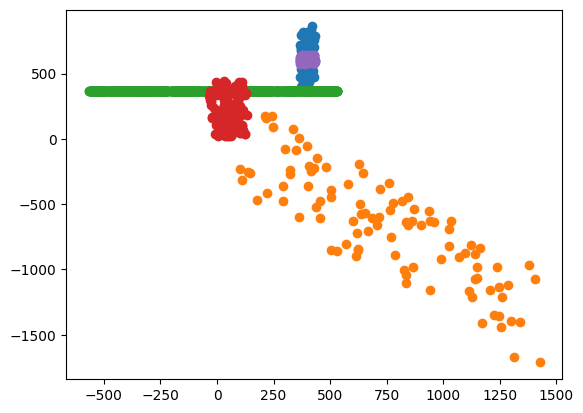

In [2]:
## And let's plot it for a random dataset
data_settings = [{'n_points':  100, 'x_range': [ 366,  433], 'y_range': [  16,  433], 'true_slope':  1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [  66, 1433], 'y_range': [-366,  433], 'true_slope': -1, 'true_intercept': 10},
                 {'n_points': 1000, 'x_range': [-566,  533], 'y_range': [ 366,  366], 'true_slope':  0, 'true_intercept':  0},
                 {'n_points':  100, 'x_range': [ -36,  133], 'y_range': [   6,  433], 'true_slope':  0, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [ 366,  433], 'y_range': [ 566,  633], 'true_slope':  0, 'true_intercept': 10}]
 
my_classes = []
for i in range(len(data_settings)):
    my_classes.append(Data_generator(data_settings=data_settings[i]))
    
for i, i_class in enumerate(my_classes): 
    i_class.generate_data()
    i_class.plot_me()

### Linear Regression

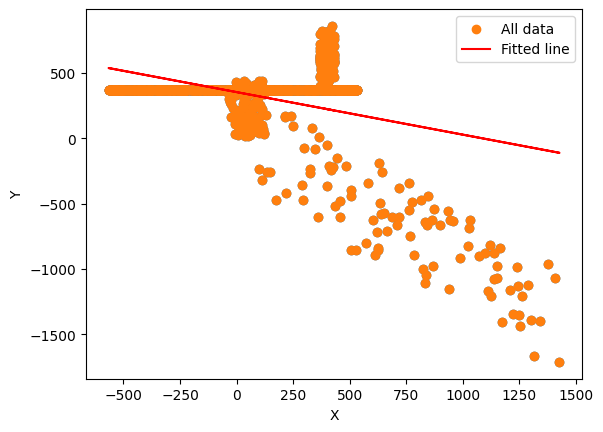

In [3]:
from sklearn.linear_model import LinearRegression

my_main_class = my_classes[0]
for i in range(1, len(my_classes)):    
    my_main_class + my_classes[i] 
my_main_class.plot_me()

x = my_main_class.data[0]
y = my_main_class.data[1]
X = x.reshape(-1, 1)  # sklearn expects a 2D array for the features

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(x, y, label='All data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### Neural Network

%### !pip install tensorflow if you need to install the Keras library

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, l1

# Generate synthetic linear data
x = my_main_class.data[0].reshape(-1, 1) 
y = my_main_class.data[1].reshape(-1, 1) 

# Define the neural network model for linear regression
model = Sequential([
    Dense(64, input_dim=1, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer without activation for linear regression
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=200, verbose=1)

# Use the model for prediction
y_pred_NN = model.predict(x)
# print("Predictions:\n", y_pred) 

Epoch 1/200
44/44 [==============================] - 0s 669us/step - loss: 171545.6094
Epoch 2/200
44/44 [==============================] - 0s 603us/step - loss: 156161.8750
Epoch 3/200
44/44 [==============================] - 0s 576us/step - loss: 156416.2969
Epoch 4/200
44/44 [==============================] - 0s 585us/step - loss: 155658.4531
Epoch 5/200
44/44 [==============================] - 0s 547us/step - loss: 155794.5469
Epoch 6/200
44/44 [==============================] - 0s 567us/step - loss: 155358.6094
Epoch 7/200
44/44 [==============================] - 0s 584us/step - loss: 155565.7812
Epoch 8/200
44/44 [==============================] - 0s 556us/step - loss: 154970.5469
Epoch 9/200
44/44 [==============================] - 0s 558us/step - loss: 156567.4219
Epoch 10/200
44/44 [==============================] - 0s 559us/step - loss: 154692.9531
Epoch 11/200
44/44 [==============================] - 0s 663us/step - loss: 155366.3125
Epoch 12/200
44/44 [=====================

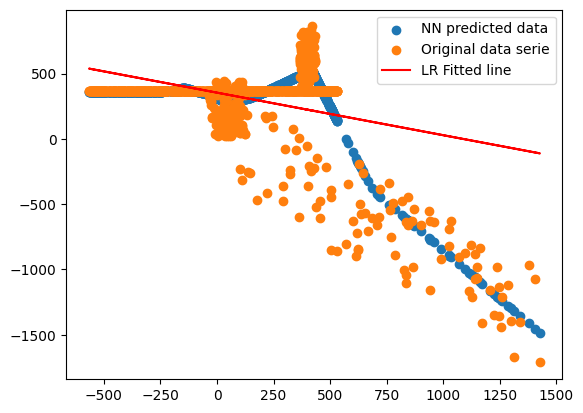

In [10]:
 
plt.scatter(x, y_pred_NN, label=f'NN predicted data')

x = my_main_class.data[0]
y = my_main_class.data[1]
X = x.reshape(-1, 1)  # sklearn expects a 2D array for the features

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(x, y, label='Original data serie')
plt.plot(x, y_pred, color='red', label='LR Fitted line')
plt.legend()

###